### Python Implementation of Decision Tree 

In [20]:
#import the required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn 

from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
#print sklearn version 
print(sklearn.__version__)

1.3.0


#### Import the file using Pandas 

In [3]:
url = "https://github.com/mawalz05/PLSC481M_Forecasting_Elections/raw/master/Elections_Data.csv"
df = pd.read_csv(url)
df

,Year,incumbent_won,party,heat_jul,heat_aug,heat_sep,heat_oct,unemployment,inflation
0,1936,1,dem,49.00,49.00,49.50,52.67,20.1,3.0
1,1940,1,dem,46.00,45.50,49.00,51.00,17.2,0.0
2,1944,1,dem,47.50,47.00,48.00,49.00,1.9,3.0
3,1948,1,dem,37.50,38.20,38.20,45.00,3.6,8.8
4,1952,0,dem,43.00,41.50,40.50,41.20,3.1,6.0
5,1956,1,rep,61.50,52.00,52.00,54.00,4.2,0.4
6,1960,0,rep,46.00,47.75,47.75,46.67,5.3,1.7
7,1964,1,dem,60.50,65.00,63.50,64.00,5.5,1.6
8,1968,0,dem,39.00,29.00,29.33,36.00,3.8,3.0
9,1972,1,rep,56.00,60.50,61.00,59.50,6.0,3.3


#### Extracting the predictors from the dataframe 

In [4]:
cols = ['heat_jul','heat_aug','heat_sep','heat_oct','unemployment','inflation']
X = df[cols]
X.shape

(21, 6)

In [5]:
X

,heat_jul,heat_aug,heat_sep,heat_oct,unemployment,inflation
0,49.00,49.00,49.50,52.67,20.1,3.0
1,46.00,45.50,49.00,51.00,17.2,0.0
2,47.50,47.00,48.00,49.00,1.9,3.0
3,37.50,38.20,38.20,45.00,3.6,8.8
4,43.00,41.50,40.50,41.20,3.1,6.0
5,61.50,52.00,52.00,54.00,4.2,0.4
6,46.00,47.75,47.75,46.67,5.3,1.7
7,60.50,65.00,63.50,64.00,5.5,1.6
8,39.00,29.00,29.33,36.00,3.8,3.0
9,56.00,60.50,61.00,59.50,6.0,3.3


#### Extracting the response variable from the dataframe 

In [6]:
y = df['incumbent_won']
y

0     1
1     1
2     1
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
11    0
12    1
13    1
14    0
15    1
16    0
17    1
18    0
19    1
20    0
Name: incumbent_won, dtype: int64

#### Reshaping the data to use in Classifier

In [12]:
y = np.array(y)
y = y.reshape(21, 1)

print(y.shape)

(21, 1)


#### Decision Tree Classifier without pruning

In [13]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X, y)
clf.score(X, y)

1.0

#### Decision Tree Classifier with pruning 

In [14]:
clf = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 2, random_state = 42)
clf.fit(X, y)
clf.score(X, y)

0.9523809523809523

#### Training and Testing Splits

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=333)
print(X_train.shape)
print(y_train.shape)

(15, 6)
(15, 1)


#### Decision Tree Classification on the training set

In [17]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

#### Decision Tree Predictions on the testing set | confusion_matrix | accuracy of classification task

In [18]:
clf.predict(X_test)
clf.score(X_test, y_test)
#overfitting

0.8333333333333334

Training:1.0
Test:0.8333333333333334


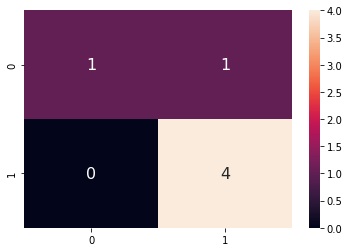

array([[1, 1],
       [0, 4]], dtype=int64)

In [21]:
clf = DecisionTreeClassifier(random_state = 42).fit(X_train,y_train)
print("Training:"+str(clf.score(X_train,y_train)))
print("Test:"+str(clf.score(X_test,y_test)))
pred = clf.predict(X_test)
confusion_matrix = confusion_matrix(y_true=y_test,y_pred=pred)

sns.heatmap(confusion_matrix,annot=True,annot_kws={"size":16})
plt.show()

confusion_matrix

#### Plotting the Decision Tree | generating the Tree

[Text(0.6, 0.875, 'x[3] <= 47.335\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.4, 0.625, 'x[5] <= 7.4\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6, 0.375, 'x[5] <= 11.05\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

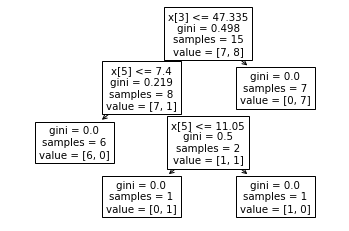

In [22]:
from sklearn import tree
tree.plot_tree(clf)

In [23]:
X_train
#variable heat_oct is our more importan predicter
#x[3] 

,heat_jul,heat_aug,heat_sep,heat_oct,unemployment,inflation
8,39.00,29.00,29.33,36.00,3.8,3.0
9,56.00,60.50,61.00,59.50,6.0,3.3
4,43.00,41.50,40.50,41.20,3.1,6.0
15,50.00,51.20,52.77,52.20,5.6,2.5
11,35.00,35.67,35.67,44.33,6.0,13.3
7,60.50,65.00,63.50,64.00,5.5,1.6
17,47.33,48.00,52.00,49.80,5.7,1.9
19,47.25,46.33,49.67,48.00,8.5,3.0
16,41.00,42.00,43.62,43.73,4.0,2.7
6,46.00,47.75,47.75,46.67,5.3,1.7


#### Another way to interpret the Decision Tree

In [25]:
text_presentation = tree.export_text(clf)
print(text_presentation)
#variable heat_oct is our more important predicter
#feature_3

|--- feature_3 <= 47.33
|   |--- feature_5 <= 7.40
|   |   |--- class: 0
|   |--- feature_5 >  7.40
|   |   |--- feature_5 <= 11.05
|   |   |   |--- class: 1
|   |   |--- feature_5 >  11.05
|   |   |   |--- class: 0
|--- feature_3 >  47.33
|   |--- class: 1



#### Which variables are of importance?

In [27]:
for name, importance in zip(X_train.columns, clf.feature_importances_):
    print(name, importance)

heat_jul 0.0
heat_aug 0.0
heat_sep 0.0
heat_oct 0.765625
unemployment 0.0
inflation 0.234375
